## Loading necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

## Train - Test - Split

In [2]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

## Scaling and Normalization

In [3]:
xtrain = xtrain.reshape(-1,28,28,1).astype('float32')/255
xtest = xtest.reshape(-1,28,28,1).astype('float32')/255

In [4]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

## Building the model

In [5]:
model = Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),


    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10,activation="softmax")

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

## Training the model

In [7]:
hist = model.fit(xtrain,ytrain,epochs=15,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8275 - loss: 0.5463 - val_accuracy: 0.9824 - val_loss: 0.0574
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9751 - loss: 0.0858 - val_accuracy: 0.9878 - val_loss: 0.0372
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0610 - val_accuracy: 0.9878 - val_loss: 0.0391
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9861 - loss: 0.0482 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9891 - loss: 0.0369 - val_accuracy: 0.9931 - val_loss: 0.0239
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9901 - loss: 0.0329 - val_accuracy: 0.9919 - val_loss: 0.0267
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9913 - val_loss: 0.0288
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0

## Epoch vs Accuracy

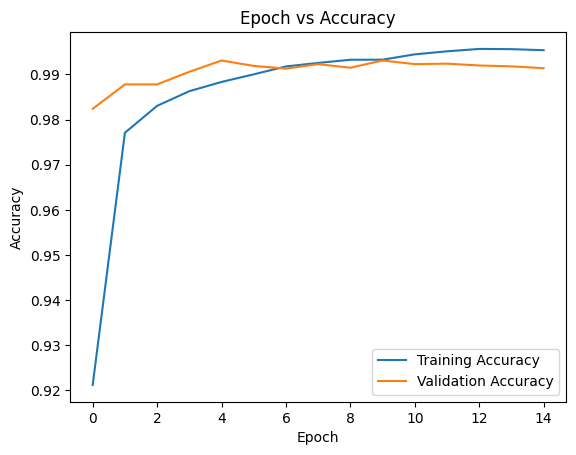

In [8]:
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.title("Epoch vs Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Epoch vs Loss

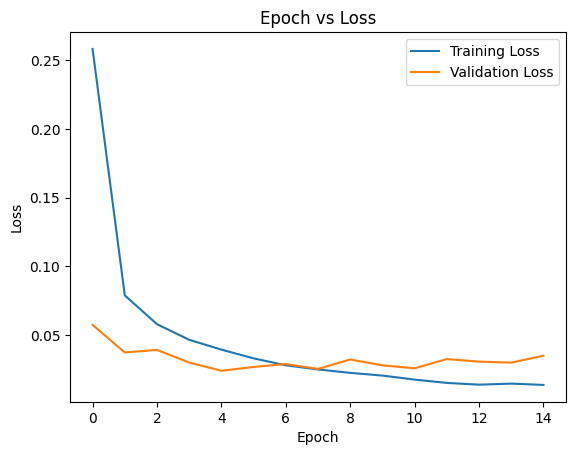

In [9]:
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
predictions = model.predict(xtest[:5])
print("Predicted Labels:",predictions.argmax(axis=1))
print("True Labels:",ytest[:5].argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Predicted Labels: [7 2 1 0 4]
True Labels: [7 2 1 0 4]
